In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import loanDFWrangle

# Gather and overview of the dataset
I open the csv file saved at the end of the wrangling notebook

In [2]:
# Read propser loan cleaned DataFrame from the created csv file from the data_wrangling.ipynb notebook
df_loan_data = pd.read_csv('prosperLoanDataCleaned.csv')

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset.

In [3]:
df_loan_data.head()

,Term,LoanStatus,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DelinquenciesLast7Years,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,Recommendations,CreditScoreRangeAvg,ListingCategory
0,36,Completed,0.1580,CO,Other,Self-employed,2,True,4,3083.333333,9425,2007-09-12,0,649.5,Not Available
1,36,Current,0.0920,CO,Professional,Employed,44,False,0,6125.000000,10000,2014-03-03,0,689.5,Home Improvement
2,36,Current,0.0974,GA,Skilled Labor,Employed,113,True,14,2875.000000,10000,2012-11-01,0,809.5,Motorcycle
3,36,Current,0.2085,MN,Executive,Employed,44,True,0,9583.333333,15000,2013-09-20,0,689.5,Home Improvement
4,60,Current,0.1314,NM,Professional,Employed,82,True,0,8333.333333,15000,2013-12-24,0,749.5,Debt Consolidation


In [4]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103244 entries, 0 to 103243
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Term                      103244 non-null  int64  
 1   LoanStatus                103244 non-null  object 
 2   BorrowerRate              103244 non-null  float64
 3   BorrowerState             103244 non-null  object 
 4   Occupation                103244 non-null  object 
 5   EmploymentStatus          103244 non-null  object 
 6   EmploymentStatusDuration  103244 non-null  int64  
 7   IsBorrowerHomeowner       103244 non-null  bool   
 8   DelinquenciesLast7Years   103244 non-null  int64  
 9   StatedMonthlyIncome       103244 non-null  float64
 10  LoanOriginalAmount        103244 non-null  int64  
 11  LoanOriginationDate       103244 non-null  object 
 12  Recommendations           103244 non-null  int64  
 13  CreditScoreRangeAvg       103244 non-null  f

Since saving a Pandas Dataframe in a csv file and re opening this same file into another Dataframe loses the categories, I have to retransform some variable into categories.

In [5]:
loanDFWrangle.categorizeVariables(df_loan_data)
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103244 entries, 0 to 103243
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Term                      103244 non-null  int64         
 1   LoanStatus                103244 non-null  category      
 2   BorrowerRate              103244 non-null  float64       
 3   BorrowerState             103244 non-null  category      
 4   Occupation                103244 non-null  category      
 5   EmploymentStatus          103244 non-null  category      
 6   EmploymentStatusDuration  103244 non-null  int64         
 7   IsBorrowerHomeowner       103244 non-null  bool          
 8   DelinquenciesLast7Years   103244 non-null  int64         
 9   StatedMonthlyIncome       103244 non-null  float64       
 10  LoanOriginalAmount        103244 non-null  int64         
 11  LoanOriginationDate       103244 non-null  datetime64[ns]
 12  Re

In [6]:
df_loan_data.describe()

,Term,BorrowerRate,EmploymentStatusDuration,DelinquenciesLast7Years,StatedMonthlyIncome,LoanOriginalAmount,Recommendations,CreditScoreRangeAvg
count,103244.000000,103244.000000,103244.000000,103244.000000,1.032440e+05,103244.000000,103244.000000,103244.000000
mean,41.270079,0.193416,96.937691,3.869910,5.714865e+03,8610.459097,0.049853,701.692864
std,10.803627,0.075538,93.937578,9.732258,7.689822e+03,6284.600451,0.341443,55.879167
min,12.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.000000,0.000000,529.500000
25%,36.000000,0.133500,27.000000,0.000000,3.333333e+03,4000.000000,0.000000,669.500000
50%,36.000000,0.184000,68.000000,0.000000,4.833333e+03,7000.000000,0.000000,689.500000
75%,36.000000,0.253700,138.000000,2.000000,6.966667e+03,12096.250000,0.000000,729.500000
max,60.000000,0.360000,755.000000,99.000000,1.750003e+06,35000.000000,39.000000,889.500000


# Goal of this exploration
In this project, I will try to understand and put into light what are the degrees of importance of the different variable in this data set that could influence the Loan status and the borrower rate.

To do so, I will start by analyzing the variables independantly from the other (univariate exploration) and then I will move toward the analysis of the relation between the variable (bivariate and multivariate exploration).

# Univariate exploration
In this section, I will explore the main variables independantly from the other to determine their distribution.
## Loan Status

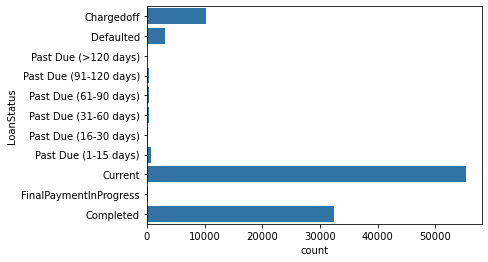

In [7]:
# Count plot of loan statuses
base_color = sb.color_palette()[0]
sb.countplot(data=df_loan_data, y='LoanStatus', color=base_color);

In this count plot, the statuses are ordered by severity from worst (Charged off) to best (Completed).  
We can notice that we are dealing mostly with completed or currently running loans. The most frequents statuses are then the loans where the borrowers completely stopped paying (Charged off or Defaulted)
In order to have a better idea of the other statuses counts, let's limit the x axis to the count of Defaulted.

In [8]:
df_loan_data.LoanStatus.value_counts()

Current                   55268
Completed                 32388
Chargedoff                10227
Defaulted                  3105
Past Due (1-15 days)        798
Past Due (31-60 days)       358
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

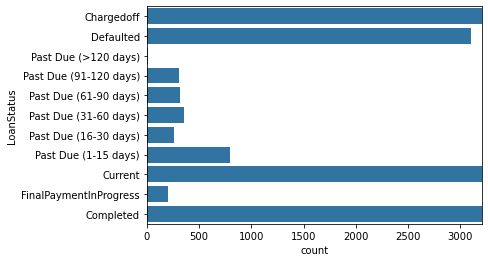

In [9]:
# Count plot of loan statuses with limited x axis to focus on the less frequent statuses
sb.countplot(data=df_loan_data, y='LoanStatus', color=base_color);
plt.xlim(None, df_loan_data.LoanStatus.value_counts().Defaulted + 100);

We can notice that all the other statuses have a really low counts w.r.t. to the above mentionned hight count statuses (up to 1 for 100).  
Inside the past due statuses, almost all have the same counts except for the first 15 days or when the past due is higher than 120 days.  

We can note there that it may be worth grouping the statuses into groups (e.g. running and completed, past due and payment stopped) to perform the bi/multivariate explarotion.

### Loan status simplification
After the univariate exploration of the Loan Status in the first part, we concluded that it may be a good idea to simplify the Loan statuses by reducing their number without losing much information.  
Here is how I will simplify the statuses:
- PaymentsStopped containing the original statuses Defaulted and Chargedoff
- PastDueSevere containing the original statuses Past Due from 61 to >120 days
- PastDueLight containing the original statuses Past Due from 1 to 60 days
- Ongoing containing the original statuses Current and FinalPaymentInProgress
- Completed which is the same status as in the original variable

In [10]:
# Dictionnary for the status simplification
#loan_status_simplification = {
#    'PaymentsStopped': ['Defaulted', 'Chargedoff'],
#    'PastDueSevere': ['Past Due \(61-90 days\)', 'Past Due \(91-120 days\)', 'Past Due \(>120 days\)'],
#    'PastDueLight': ['Past Due \(1-15 days\)', 'Past Due \(16-30 days\)', 'Past Due \(31-60 days\)'],
#    'Ongoing': ['Current', 'FinalPaymentInProgress'],
#    'Completed': ['Completed'],
#}
loan_status_simplification = {
    'PaymentsStopped': ['Defaulted', 'Chargedoff'],
    'PastDue': ['Past Due.*'],
    'Ongoing': ['Current', 'FinalPaymentInProgress'],
    'Completed': ['Completed'],
}

# Copy LoanStatus into LoanStatusSimplified
df_loan_data['LoanStatusSimplified'] = df_loan_data.LoanStatus.astype(str)
for simpl_status, status_list in loan_status_simplification.items():
    for status in status_list:
        # print('replacing \'{}\' with \'{}\''.format(status, simpl_status))
        # And replace all the entries using the simplification dictionnary
        df_loan_data.LoanStatusSimplified = df_loan_data.LoanStatusSimplified.str.replace(status, simpl_status)

df_loan_data.LoanStatusSimplified.value_counts()

Ongoing            55471
Completed          32388
PaymentsStopped    13332
PastDue             2053
Name: LoanStatusSimplified, dtype: int64

In [11]:
# Transform LoanStatusSimplified into an ordered category
loan_status_simplified_list = list(loan_status_simplification.keys())
loan_status_simplified_class = pd.api.types.CategoricalDtype(ordered=True, categories=loan_status_simplified_list)
df_loan_data.LoanStatusSimplified = df_loan_data.LoanStatusSimplified.astype(loan_status_simplified_class);
df_loan_data.LoanStatusSimplified

0         Completed
1           Ongoing
2           Ongoing
3           Ongoing
4           Ongoing
            ...    
103239      Ongoing
103240      Ongoing
103241      Ongoing
103242    Completed
103243      Ongoing
Name: LoanStatusSimplified, Length: 103244, dtype: category
Categories (4, object): ['PaymentsStopped' < 'PastDue' < 'Ongoing' < 'Completed']

In [12]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103244 entries, 0 to 103243
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Term                      103244 non-null  int64         
 1   LoanStatus                103244 non-null  category      
 2   BorrowerRate              103244 non-null  float64       
 3   BorrowerState             103244 non-null  category      
 4   Occupation                103244 non-null  category      
 5   EmploymentStatus          103244 non-null  category      
 6   EmploymentStatusDuration  103244 non-null  int64         
 7   IsBorrowerHomeowner       103244 non-null  bool          
 8   DelinquenciesLast7Years   103244 non-null  int64         
 9   StatedMonthlyIncome       103244 non-null  float64       
 10  LoanOriginalAmount        103244 non-null  int64         
 11  LoanOriginationDate       103244 non-null  datetime64[ns]
 12  Re

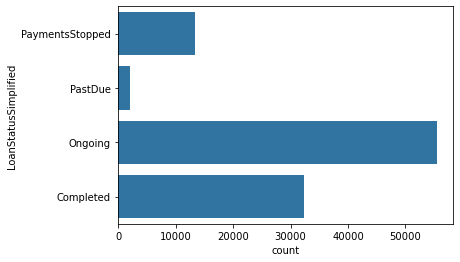

In [13]:
# Count plot of simplified loan statuses
sb.countplot(data=df_loan_data, y='LoanStatusSimplified', color=base_color);

We can notice that most of the Loan Status are either ongoing or completed.

## Borrower Rate

In [14]:
df_loan_data.BorrowerRate.describe()

count    103244.000000
mean          0.193416
std           0.075538
min           0.000000
25%           0.133500
50%           0.184000
75%           0.253700
max           0.360000
Name: BorrowerRate, dtype: float64

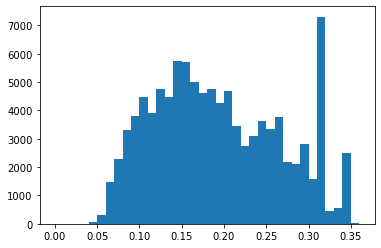

In [15]:
# Histogram of the borrower rate
bin_step = 0.01
bins = np.arange(df_loan_data.BorrowerRate.min(), df_loan_data.BorrowerRate.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='BorrowerRate', color=base_color, bins=bins);

We can notice that the rate distribution is normal and quite symetric, with a slight skew to the right and almost unimodal, except for 2 pikes between 0.3 and 0.35.  
The rates are evolving from 0.05 to 0.35 with a median at 0.18.
## Loan Term

In [16]:
df_loan_data.Term.value_counts()

36    77345
60    24285
12     1614
Name: Term, dtype: int64

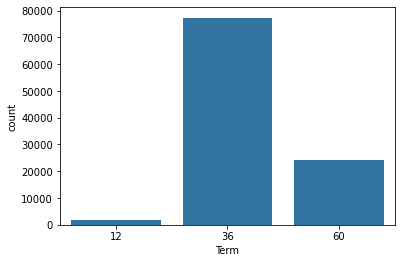

In [17]:
# Count plot of loan term
sb.countplot(data=df_loan_data, x='Term', color=base_color);

We can notice here that there are only 3 different loan terms (12, 36 or 60 months) with 36 months being the most common.

Since there were only 3 values in the term variable, I found it clearer to use a count plot instead of a histogram in which there are a lot of empty space between the bars.

## Borrower State

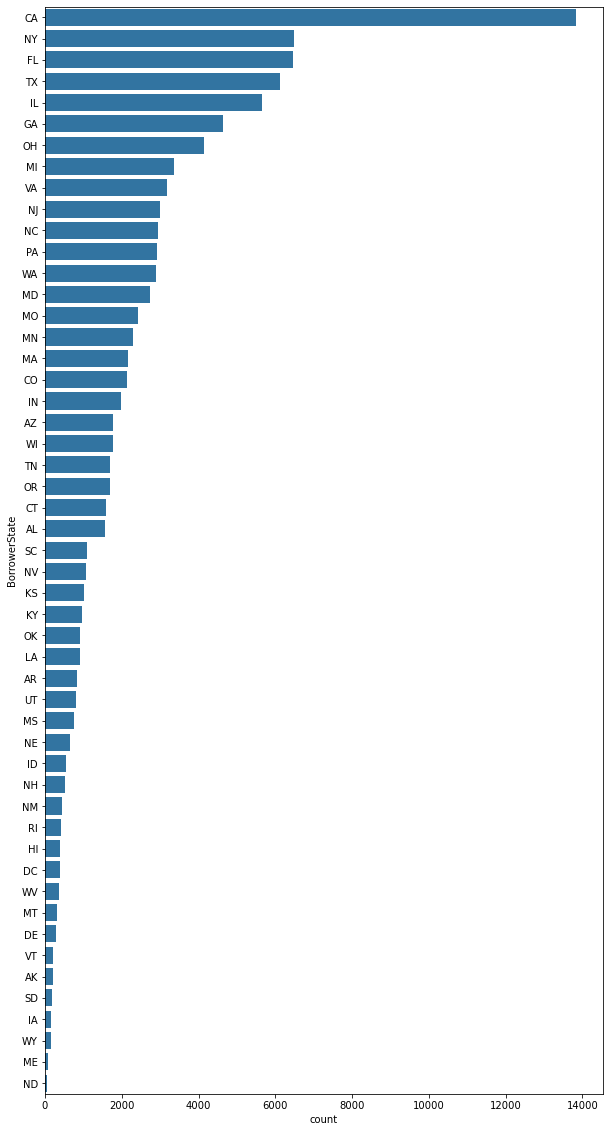

In [18]:
# Count plot of Borrower state
state_order = df_loan_data.BorrowerState.value_counts().index

plt.figure(figsize=(10, 20))
sb.countplot(data=df_loan_data, y='BorrowerState', color=base_color, order=state_order);

We can notice that the borrowers live mainly in California (~1 out of 8) and that the distribution between the states is not equal.

## Borrower Occupation

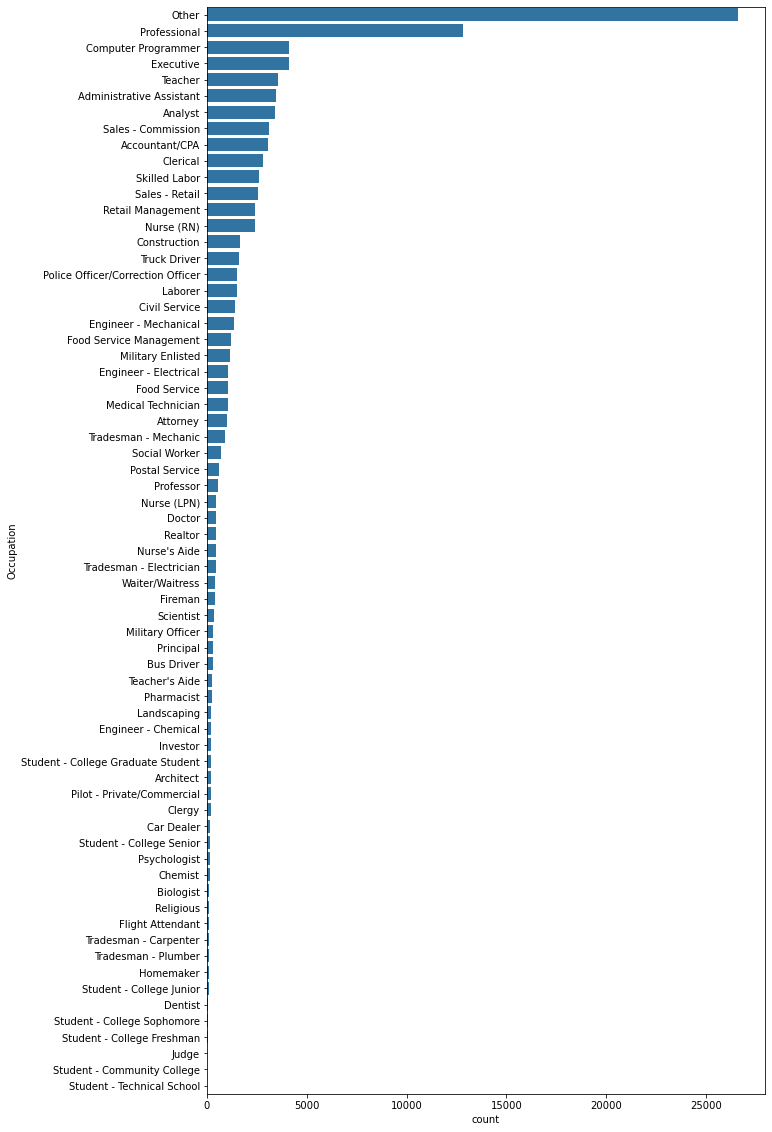

In [19]:
# Count plot of borrower occupation
occupation_order = df_loan_data.Occupation.value_counts().index

plt.figure(figsize=(10, 20))
sb.countplot(data=df_loan_data, y='Occupation', color=base_color, order=occupation_order);

We can notice that the 2 Occupations with highest counts are Other and Professionnal, which don't bring much information about the borrower.  
Let's limit the x axis to focus on the other occupations.

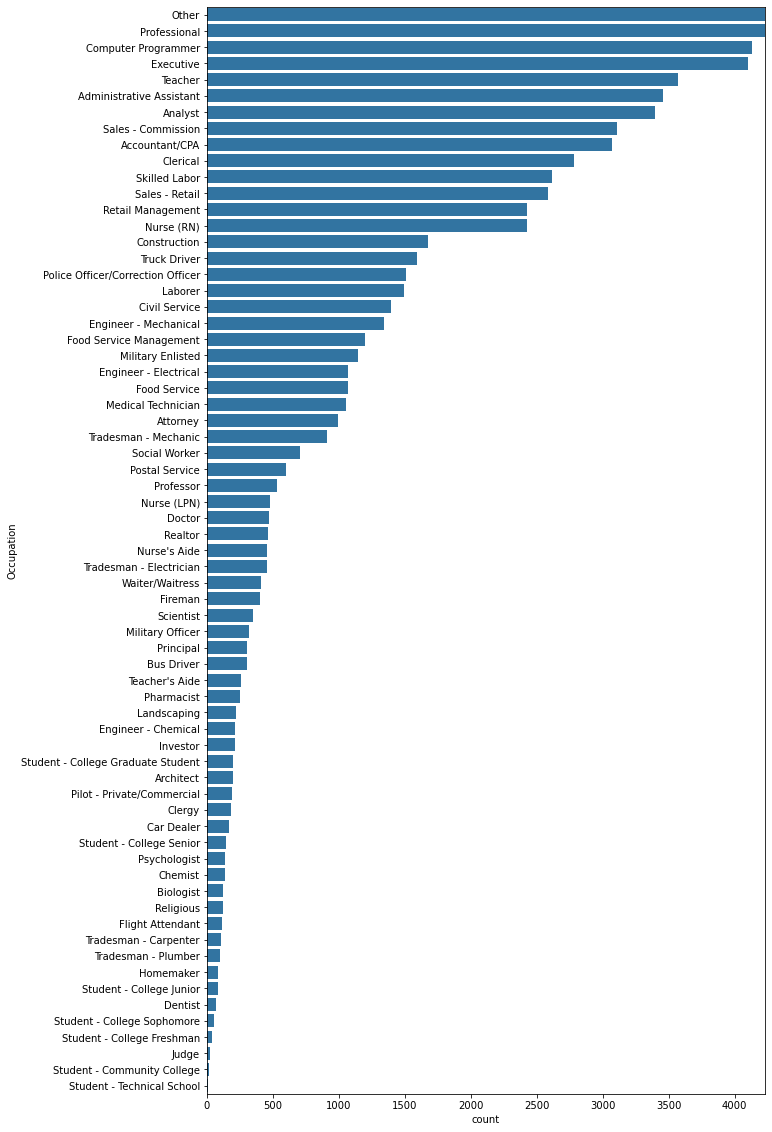

In [20]:
# Count plot of borrower occupation with focus on the lower frequencies
plt.figure(figsize=(10, 20))
sb.countplot(data=df_loan_data, y='Occupation', color=base_color, order=occupation_order);
plt.xlim(None, df_loan_data.Occupation.value_counts()['Computer Programmer'] + 100);

There are a lot of different occupation that will make the multivariate exploration later overloaded.  
We can take note here that it may be worth regrouping the occupations later in the exploration and also not use the Other or Professional occupations that don't bring much information about the borrower.

## Borrower Employment Status

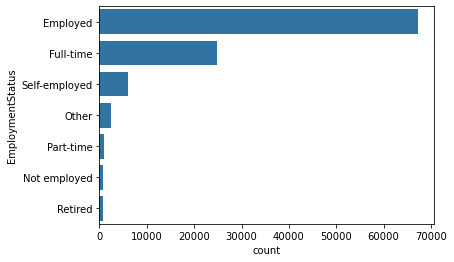

In [21]:
# Count plot of borrower employment status
empl_status_order = df_loan_data.EmploymentStatus.value_counts().index

sb.countplot(data=df_loan_data, y='EmploymentStatus', color=base_color, order=empl_status_order);

We can notice that most of the borrower are employed in this data set.

## Borrower Employment Status Duration

In [22]:
df_loan_data.EmploymentStatusDuration.describe()

count    103244.000000
mean         96.937691
std          93.937578
min           0.000000
25%          27.000000
50%          68.000000
75%         138.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

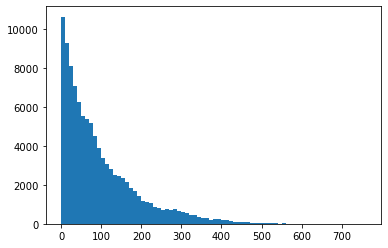

In [23]:
# Histogram of borrower employment status duration
bin_step = 10
bins = np.arange(df_loan_data.EmploymentStatusDuration.min(), df_loan_data.EmploymentStatusDuration.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='EmploymentStatusDuration', color=base_color, bins=bins);

In this histogram, we can notice that the employment status duration is very skewed to the right.  
Let's try the same graph with a log scale on the x axis

In [24]:
np.log10(df_loan_data.EmploymentStatusDuration.describe())

/home/simon/anaconda3/envs/data-analysis/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.013865
mean     1.986493
std      1.972839
min          -inf
25%      1.431364
50%      1.832509
75%      2.139879
max      2.877947
Name: EmploymentStatusDuration, dtype: float64

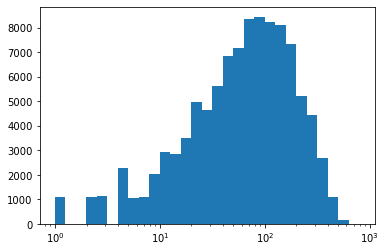

In [25]:
# Histogram of borrower employment status duration with log scale
# Let's use the log10(1)=0, with 1 the smallest duration value higher than 0 as min value for our log scale
bin_step = 0.1
bins = 10 ** np.arange(0, 2.9 + bin_step, bin_step)
plt.hist(data=df_loan_data, x='EmploymentStatusDuration', color=base_color, bins=bins);
plt.xscale('log');

Under a log scale, we can notice that the data is normally distributed and uninodal with its peak around 100 months and slightly skewed to the left.

## Is Borrower Homeowner

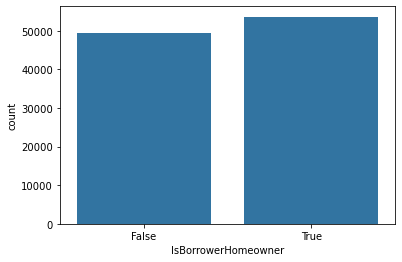

In [26]:
# Count plot of borrower home ownership status
sb.countplot(data=df_loan_data, x='IsBorrowerHomeowner', color=base_color);

This count plot tells us that there are as many borrowers who own a house a borrower who don't.

## Borrower Delinquencies Last 7 Years

In [27]:
df_loan_data.DelinquenciesLast7Years.describe()

count    103244.000000
mean          3.869910
std           9.732258
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          99.000000
Name: DelinquenciesLast7Years, dtype: float64

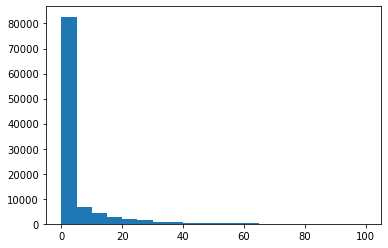

In [28]:
# histogram of borrower deliquencies in the last 7 years
bin_step = 5
bins = np.arange(df_loan_data.DelinquenciesLast7Years.min(), df_loan_data.DelinquenciesLast7Years.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='DelinquenciesLast7Years', color=base_color, bins=bins);

We can observe that most of the borrowers don't have any delinquencies during the last 7 years. In fact at least 50% of them don't have any deliquency at all and 75% of them had 2 or less deliquencies during the last 7 years.

Let's check if we only observe the borrowers with at least one deliquencies.

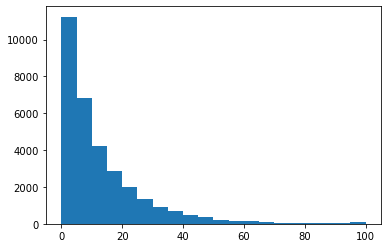

In [29]:
# histogram of borrower deliquencies in the last 7 years for the borrowers who had at least one deliquency
bin_step = 5
bins = np.arange(df_loan_data.DelinquenciesLast7Years.min(), df_loan_data.DelinquenciesLast7Years.max() + bin_step, bin_step);
plt.hist(data=df_loan_data[df_loan_data.DelinquenciesLast7Years > 0], x='DelinquenciesLast7Years', color=base_color, bins=bins);

We can see that the histogram is still very skewed to the right with the number of deliquencies going from 0 to 100.

## Borrower Stated Monthly Income

In [30]:
df_loan_data.StatedMonthlyIncome.describe()

count    1.032440e+05
mean     5.714865e+03
std      7.689822e+03
min      0.000000e+00
25%      3.333333e+03
50%      4.833333e+03
75%      6.966667e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

It seems that some entries may not fit with the description of the data. Some of the borrowers stated some monthly income higher than 100000$ which seem yearly incomes. Let's analyze this a bit deeper.

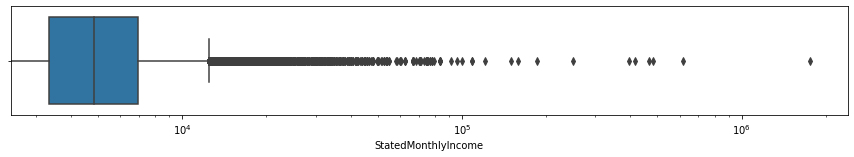

In [31]:
plt.figure(figsize=[15, 2]);
sb.boxplot(data=df_loan_data, x='StatedMonthlyIncome', color=base_color);
plt.xscale('log');

The box plot from the stated monthly income shows that we have a lot of outliers in the high incomes.  
Even if a monthly income of +100k$ is not impossible, this is quite rare for those kind of person to contract a loan. There is even a monthly income higher than 1 million. The reason can be simply that the people stated their yearly income instead of their montly income.

I will first remove the monthly incomes higher than 1 million from the data set. Then, I will transform every monthly income higher than 10k$ by dividing it by 12 to change it from yearly to monthly income.

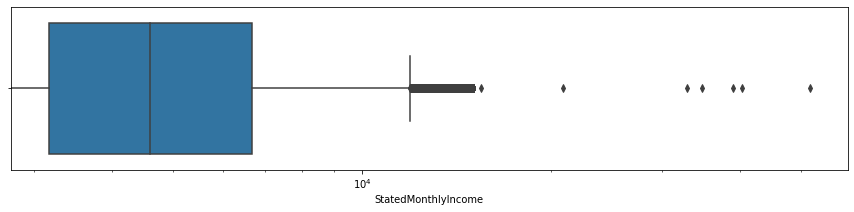

In [32]:
# Keep only the entries with stated monthly income lower than 1 million
df_loan_data = df_loan_data[df_loan_data.StatedMonthlyIncome < 1000000]

# Divide by 12 each monthly income higher than 15k$ to transform from 
df_loan_data.StatedMonthlyIncome = df_loan_data.StatedMonthlyIncome.apply(lambda x: x/12 if x > 15000 else x)
plt.figure(figsize=[15, 3]);
sb.boxplot(data=df_loan_data, x='StatedMonthlyIncome', color=base_color);
plt.xscale('log');

In [33]:
df_loan_data.StatedMonthlyIncome.describe()

count    103243.000000
mean       5165.004868
std        2843.062811
min           0.000000
25%        3166.666667
50%        4583.333333
75%        6666.666667
max       51545.652778
Name: StatedMonthlyIncome, dtype: float64

We have now less outliers in the monthly stated income.

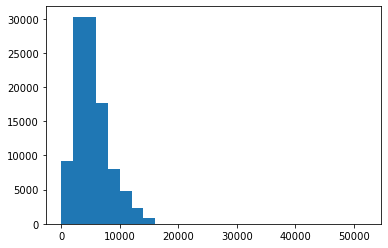

In [34]:
# histogram of borrower stated monthly income
bin_step = 2000
bins = np.arange(df_loan_data.StatedMonthlyIncome.min(), df_loan_data.StatedMonthlyIncome.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='StatedMonthlyIncome', color=base_color, bins=bins);

As we can see, the borrower stated monthly income is completely skewed on the right. Let's try to apply a log scale on the x axis.

In [35]:
np.log10(df_loan_data.StatedMonthlyIncome.describe())

/home/simon/anaconda3/envs/data-analysis/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.013861
mean     3.713071
std      3.453786
min          -inf
25%      3.500602
50%      3.661181
75%      3.823909
max      4.712192
Name: StatedMonthlyIncome, dtype: float64

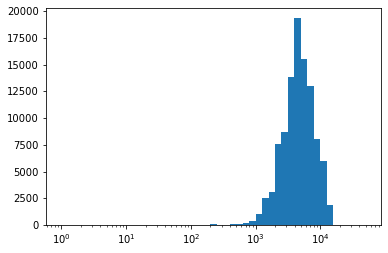

In [36]:
# Histogram of borrower stated monthly income with log scale
# Let's use the log10(1)=0, with 1 the smallest monthly income value higher than 0 as min value for our log scale
bin_step = 0.1
bins = 10 ** np.arange(0, 4.7 + bin_step, bin_step)
plt.hist(data=df_loan_data, x='StatedMonthlyIncome', color=base_color, bins=bins);
plt.xscale('log');

As we can see, on a log scale, the stated monthly income is normally distributed, uninodal and symetrical around ~5000\$.

Let's zoom in by removing the 5\% at each extremities of the histogram.

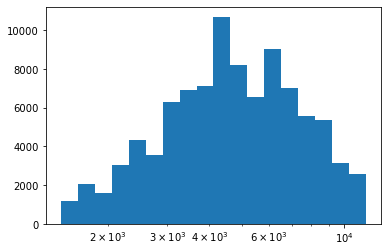

In [37]:
# Histogram of borrower stated monthly income with log scale without 5% outliers
bin_step = 0.05
min_outlier = np.log10(df_loan_data.StatedMonthlyIncome.describe([0.05, 0.5, 0.95]))['5%']
max_outlier = np.log10(df_loan_data.StatedMonthlyIncome.describe([0.05, 0.5, 0.95]))['95%']
bins = 10 ** np.arange(min_outlier, max_outlier + bin_step, bin_step)
plt.hist(data=df_loan_data, x='StatedMonthlyIncome', color=base_color, bins=bins);
plt.xscale('log');

The diagramm without the outlier confirm the normal distribution unimodal and symetric centered around ~5000.

### Loan Original Amount

In [38]:
df_loan_data.LoanOriginalAmount.describe()

count    103243.000000
mean       8610.503753
std        6284.614506
min        1000.000000
25%        4000.000000
50%        7000.000000
75%       12097.500000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

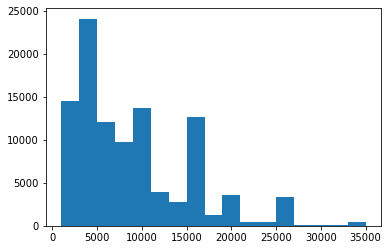

In [39]:
# histogram of loan original amount
bin_step = 2000
bins = np.arange(df_loan_data.LoanOriginalAmount.min(), df_loan_data.LoanOriginalAmount.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='LoanOriginalAmount', color=base_color, bins=bins);

As we can see, the loan original amount is completely skewed on the right. Let's try to apply a log scale on the x axis.

In [40]:
np.log10(df_loan_data.LoanOriginalAmount.describe())

count    5.013861
mean     3.935029
std      3.798279
min      3.000000
25%      3.602060
50%      3.845098
75%      4.082696
max      4.544068
Name: LoanOriginalAmount, dtype: float64

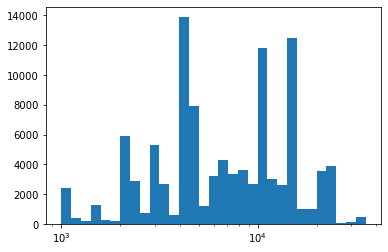

In [41]:
# Histogram of loan original amount with log scale
bin_step = 0.05
bins = 10 ** np.arange(3.0, 4.54 + bin_step, bin_step)
plt.hist(data=df_loan_data, x='LoanOriginalAmount', color=base_color, bins=bins);
plt.xscale('log');

The log scale distribution isn't normal and it just confirms that the loan original amount has peaks around 5000, 10000 and 15000 \$.

## Borrower Recommendations

In [42]:
df_loan_data.Recommendations.describe()

count    103243.000000
mean          0.049853
std           0.341445
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: Recommendations, dtype: float64

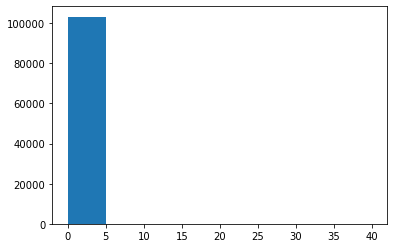

In [43]:
# histogram of borrower recommandation
bin_step = 5
bins = np.arange(df_loan_data.Recommendations.min(), df_loan_data.Recommendations.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='Recommendations', color=base_color, bins=bins);

From the histogram and the describtion, we can notice that most of the borrowers don't have any recommandation.  
Let's re draw the histogram with only the people who have at least one recommandation

In [44]:
df_loan_data[df_loan_data.Recommendations > 0].Recommendations.describe()

count    3998.000000
mean        1.287394
std         1.190697
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        39.000000
Name: Recommendations, dtype: float64

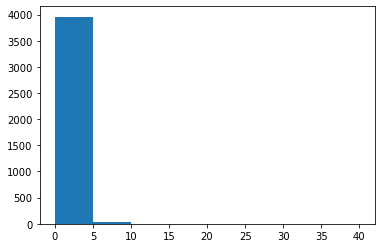

In [45]:
# histogram of borrower having at least one recommandation
bin_step = 5
bins = np.arange(df_loan_data.Recommendations.min(), df_loan_data.Recommendations.max() + bin_step, bin_step);
plt.hist(data=df_loan_data[df_loan_data.Recommendations > 0], x='Recommendations', color=base_color, bins=bins);

We can see again that most of the people having at least one recommandation, have just one recommandation.

Later in the multivariate exploration, it may be worth to transform this variable into a boolean one (have at least a recommandation or don't have at all)

## Borrower Credit Score Range Average

In [46]:
df_loan_data.CreditScoreRangeAvg.describe()

count    103243.000000
mean        701.692400
std          55.879239
min         529.500000
25%         669.500000
50%         689.500000
75%         729.500000
max         889.500000
Name: CreditScoreRangeAvg, dtype: float64

In [47]:
df_loan_data.CreditScoreRangeAvg.value_counts()

689.5    15693
669.5    15466
709.5    14878
729.5    12367
649.5    11122
749.5     8921
769.5     6312
789.5     4407
629.5     3426
609.5     2799
809.5     2489
829.5     1319
529.5     1024
569.5      888
589.5      759
549.5      640
849.5      527
869.5      183
889.5       23
Name: CreditScoreRangeAvg, dtype: int64

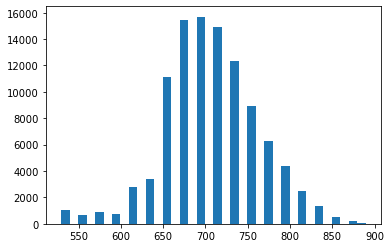

In [48]:
# histogram of borrower credit score range average
bin_step = 10
bins = np.arange(df_loan_data.CreditScoreRangeAvg.min(), df_loan_data.CreditScoreRangeAvg.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='CreditScoreRangeAvg', color=base_color, bins=bins);

We can notice that the credit score range average takes only certain unique values between 529 and 889.  
The histogram shows us that the score is normally distributed, unimodal and symetric around 700.

## Loan Listing Category

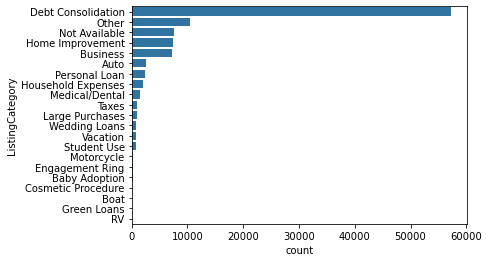

In [49]:
# Count plot of loan listing category
list_cat_order = df_loan_data.ListingCategory.value_counts().index

sb.countplot(data=df_loan_data, y='ListingCategory', color=base_color, order=list_cat_order);

We can observe that the main reason to borrow money is to consolidate a debt.  
The 2 following reasons don't bring much information.

Let's focus on the rest of the category by limiting the x axis.

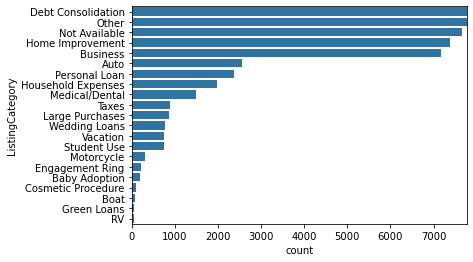

In [50]:
# Count plot of loan listing category focusing on the category with lower count
list_cat_order = df_loan_data.ListingCategory.value_counts().index

sb.countplot(data=df_loan_data, y='ListingCategory', color=base_color, order=list_cat_order);
plt.xlim(None, df_loan_data.ListingCategory.value_counts()['Not Available'] + 100);

We can notice that the 2 main reasons to borrow money, after the debt consolidation is to improve its home or create/support a business.

# Bivariate and Multivariate exploration
## Analysis of the influence of some variables on the Loan Status
In this section, I will try to find the main variables that can have an impact of the loan status by using bivariate or multivariate analysis technics.

### Borrower rate
Let's explore the relation between the loan statuses and the borrower rate using a box plot.

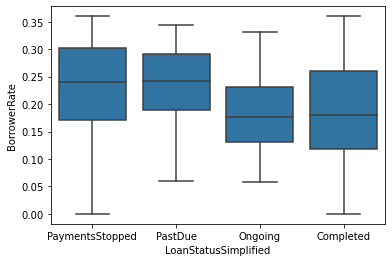

In [51]:
sb.boxplot(data=df_loan_data, x='LoanStatusSimplified', y='BorrowerRate', color=base_color);

We can notice that loan with stopped payments and the past due have a higher rate.

That could be explained by the fact that the higher the rate, the higher the price of the loan so borrower with hight rates have more chance to find themselves not able to pay anymore.

### Borrower Delinquencies Last 7 Years
Let's explore the relation of the loan statuses and the borrower number of delinquencies in the last 7 years with a violin plot.

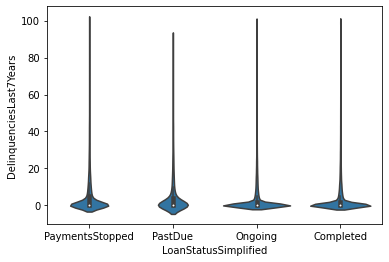

In [52]:
sb.violinplot(data=df_loan_data, x='LoanStatusSimplified', y='DelinquenciesLast7Years', color=base_color);

From those 2 plots, we cannot draw any conclusion about any relation between the number of deliquencies and the loan status.  
The fact that most of the borrowers don't have any delinquency gives to the violin the same shape for all the statuses.

### Is Borrower Homeowner
Let's explore the relation of the loan statuses and the fact that the borrower is a home owner or not with a clustered count plot.

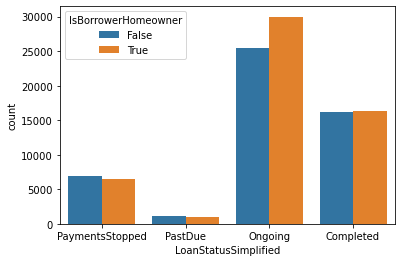

In [53]:
sb.countplot(data=df_loan_data, x='LoanStatusSimplified', hue='IsBorrowerHomeowner');

This clustered count plot shows us that there is almost no correlation between the loan statuses and the fact that the borrower is a home owner.

### Borrower Stated Monthly Income
Let's explore the relation of the loan statuses and the borrower stated monthly income with a box plot.

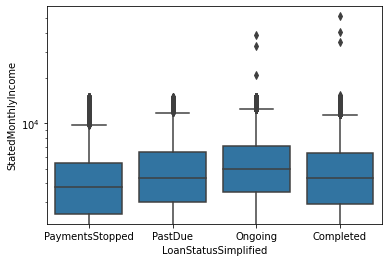

In [54]:
sb.boxplot(data=df_loan_data, x='LoanStatusSimplified', y='StatedMonthlyIncome', color=base_color);
plt.yscale('log');

This box plot shows us that the borrowers who stop their payment have in general less income than those who completed their loan.

### Loan Original Amount
Let's explore the relation of the loan statuses and the loan original amount with a box plot.

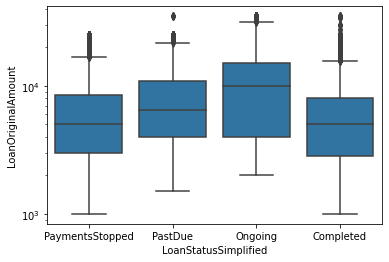

In [55]:
sb.boxplot(data=df_loan_data, x='LoanStatusSimplified', y='LoanOriginalAmount', color=base_color);
plt.yscale('log');

We cannot draw any conclusion from this box plot regarding the relation between the Loan Original amount and the loan status.

The 2 last variables don't have much influence on the loan status, but the debt to income ratio could have a higher influence on the loan status. Let's create this new variable

### Debt to Income Ratio

In [56]:
# Debt to income ration is the loan amount divided by the stated monthly income
#df_loan_data['Debt2IncomeRatio'] = df_loan_data.LoanOriginalAmount / df_loan_data.StatedMonthlyIncome
#df_loan_data.assign(Debt2IncomeRatio = lambda x: x.LoanOriginalAmount / x.StatedMonthlyIncome if x.StatedMonthlyIncome > 0 else 5)
max_loan_amount_2_income_ratio = 50.0
df_loan_data['LoanAmount2IncomeRatio'] = max_loan_amount_2_income_ratio
df_loan_data.loc[df_loan_data.StatedMonthlyIncome > 0, ['LoanAmount2IncomeRatio']] = df_loan_data.LoanOriginalAmount / df_loan_data.StatedMonthlyIncome
df_loan_data.loc[df_loan_data.LoanAmount2IncomeRatio > max_loan_amount_2_income_ratio, ['LoanAmount2IncomeRatio']] = max_loan_amount_2_income_ratio

df_loan_data.LoanAmount2IncomeRatio.describe([0.05, 0.5, 0.95])

count    103243.000000
mean          2.718811
std           6.211859
min           0.057600
5%            0.375000
50%           1.589404
95%           5.142857
max          50.000000
Name: LoanAmount2IncomeRatio, dtype: float64

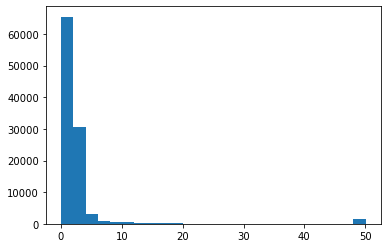

In [57]:
bin_step = 2
bins = np.arange(df_loan_data.LoanAmount2IncomeRatio.min(), df_loan_data.LoanAmount2IncomeRatio.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='LoanAmount2IncomeRatio', color=base_color, bins=bins);

We can notice that the debt to income ratio is very skewed to the right, and that we have a peak at the highest loan amount 2 income ratio I set. This limit is very high so they may be entries with eroneous data.

Let's explore the relation of the loan statuses and the loan amount to income ratio with a box plot.

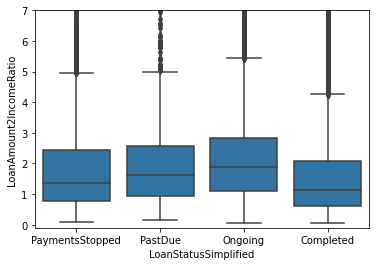

In [58]:
sb.boxplot(data=df_loan_data, x='LoanStatusSimplified', y='LoanAmount2IncomeRatio', color=base_color);
plt.ylim(-0.1, 7);

The box plot doesn't show us much more that what we concluded with the loan amount or the income.

### Borrower Credit Score Range Average
Let's explore the relation of the loan statuses and the credit average score with a box plot.

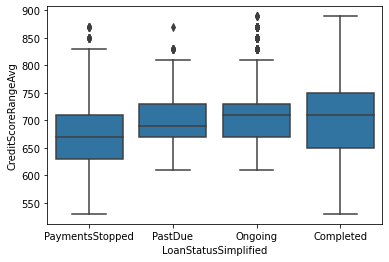

In [59]:
sb.boxplot(data=df_loan_data, x='LoanStatusSimplified', y='CreditScoreRangeAvg', color=base_color);

With this plot, we can see that the loan with stopped payments are the one from the Borrower with the lower Credit Score.

## Analysis of the influence of some variables on the Borrower rate
In this section, I will try to find the main variables that can have an impact of the borrower rate by using bivariate or multivariate analysis technics.

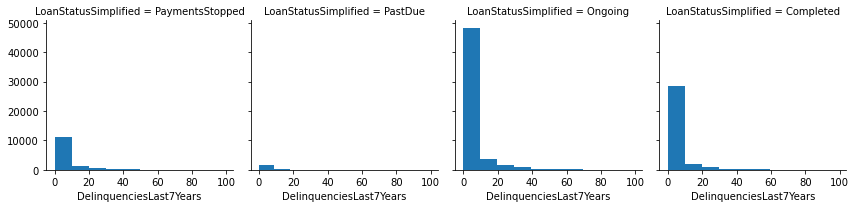

In [60]:
g = sb.FacetGrid(data = df_loan_data, col = 'LoanStatusSimplified');
g.map(plt.hist, "DelinquenciesLast7Years");